# Outliers in numerical data

Detecting and getting rid of outliers is a time-consuming and critical process in any
data wrangling pipeline. They need deep domain knowledge, expertise in descriptive
statistics, mastery over the programming language (and all the useful libraries), and a
lot of caution. We recommend being very careful when performing this operation on
a dataset.

A z-score is a measure on a set of data that gives a value for each data point regarding how much that data point is spread out with respect to the standard deviation and mean of the dataset. The z-score can be used to numerically detect outliers in a set of data. Any data point with a z-score greater than +3 or less than -3 is considered an outlier.

Levenshtein distance is an advanced concept. We can think of it as the minimum number of single-character edits that are needed to convert one string into another. When two strings are identical, the distance between them is 0 – the bigger the difference, the higher the number. We can consider a threshold of distance, under which two strings are considered the same.

* [Importing libraries and packages](#importing)
* [Detecting outliers in numerical data](#numerical-outliers)
* [The Z-Score value](#z-score)
* [Fuzzy string matching](#fuzzy)


<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd
from math import cos, pi
from scipy import stats
from Levenshtein import distance

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

<a id="numerical-outliers"></a>
## Detecing outliers in numerical data

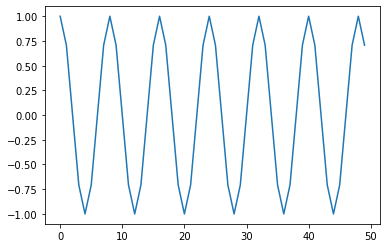

In [2]:
ys = [cos(i*(pi/4)) for i in range(50)]
plt.plot(ys)

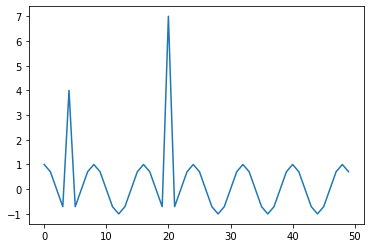

In [3]:
# Introducing outliers
ys[4] = ys[4] + 5.0
ys[20] = ys[20] + 8.0
plt.plot(ys)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae7ac03070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae7ac036d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae7ac6fd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae7ac03bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae7ac03e80>],
 'means': []}

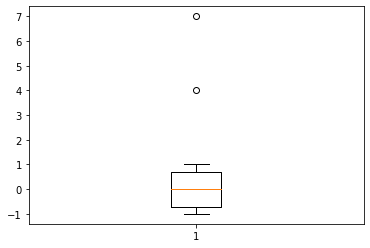

In [4]:
# Boxplotting for visual cues on outliers
plt.boxplot(ys)

<a id="z-score"></a>
## The Z-Score value

In [5]:
df_original = pd.DataFrame(ys)
cos_arr_z_score = stats.zscore(ys)
cos_arr_without_outliers = df_original[(cos_arr_z_score < 3)]

print(cos_arr_without_outliers.shape)
print(df_original.shape)

(49, 1)
(50, 1)


<a id="fuzzy"></a>
## Fuzzy string matching

In [6]:
# A problem that may look like an outlier, but is not.
# Creating the load data of a ship on three different dates:
ship_data = {"Sea Princess": {"date":"12/08/20", "load": 40000},
             "Sea Pincess": {"date":"10/06/20", "load": 30000},
             "Sea Princes": {"date":"12/04/20", "load": 30000}}

# Passing two strings to the distance function to calculate the distance between them
name_of_ship = "Sea Princess"
for k, v in ship_data.items():
    print("{} {} {}".format(k, name_of_ship, distance(name_of_ship, k)))

Sea Princess Sea Princess 0
Sea Pincess Sea Princess 1
Sea Princes Sea Princess 1
